In [652]:
#Selecting the directory of the file

import os
os.chdir('C:/Users/viswanath/Downloads')

In [653]:
#Importing warnings library to exclude warnings in notebook

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [654]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [655]:
#prints the images in the note book

%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

In [656]:
# Importing differenting algorithms for this problem

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [657]:
#Importing different metrics used for the avaluation

from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score,f1_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Imputer,LabelEncoder,OneHotEncoder

In [658]:
#Importing SMOTE for over sampling the minority class (to balance Imbalance data)

from imblearn.over_sampling import SMOTE

In [659]:
#modules for implementing NN -- Keras

from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

In [660]:
#Loading Dataset

attrition = pd.read_csv('Employee-Attrition.csv')
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [661]:
attrition.shape

(1470, 35)

In [662]:
attrition.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [663]:
attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [664]:
attrition.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [665]:
attrition.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


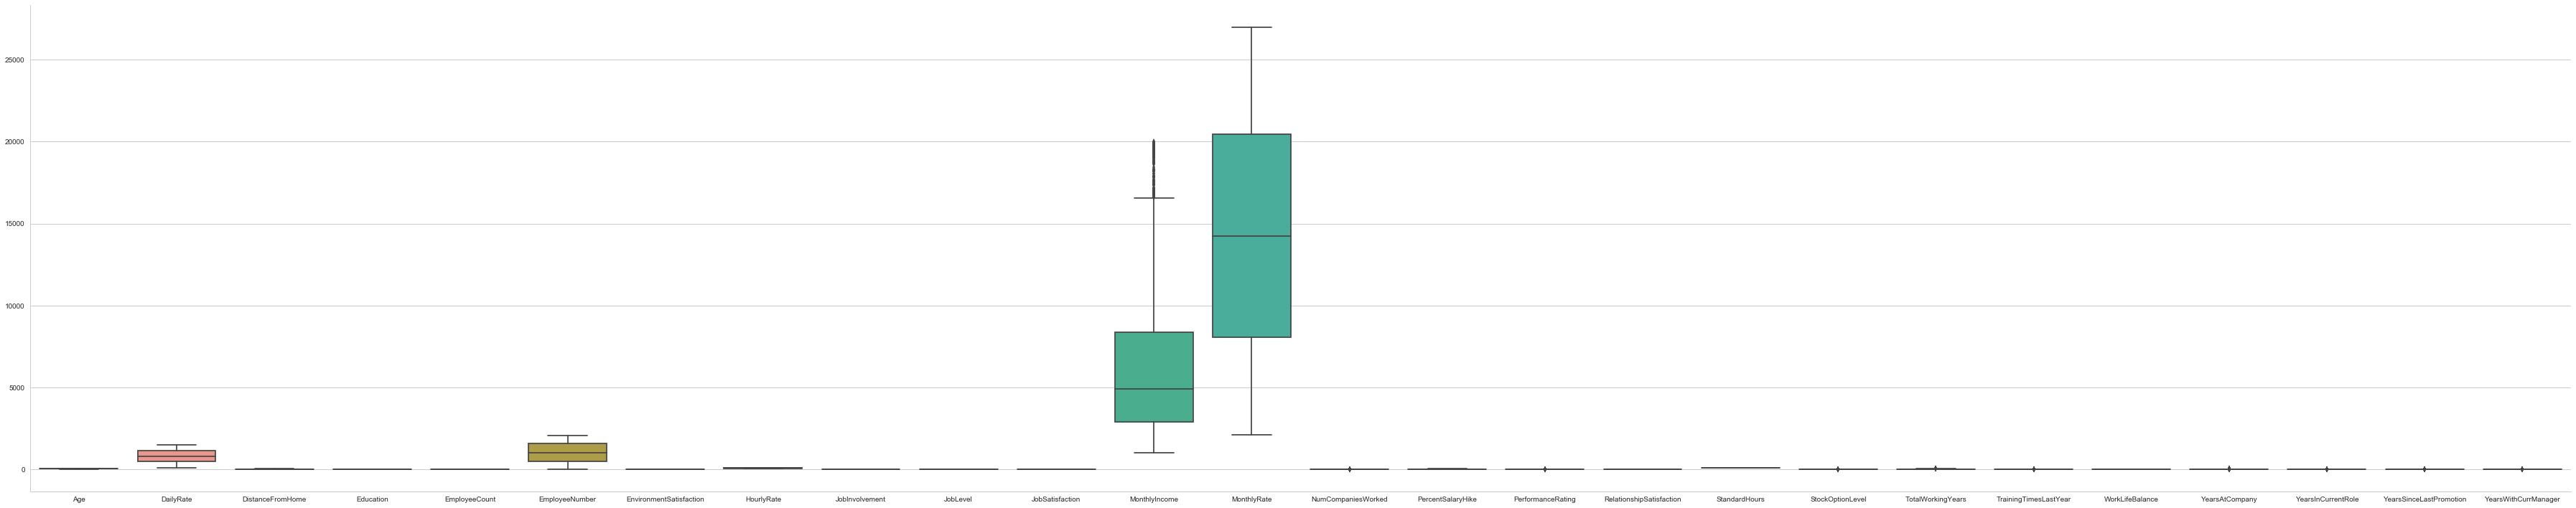

In [666]:
#Factor plot to see how the data is distributed across dataset

sns.factorplot(data=attrition,kind='box',size=10,aspect=5)

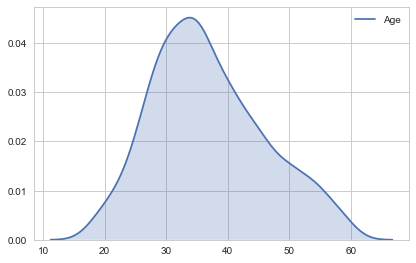

In [667]:
#Age Distribution

sns.kdeplot(attrition.Age,shade=True)

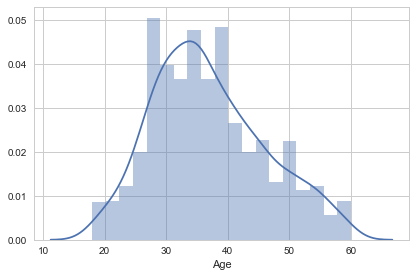

In [668]:
sns.distplot(attrition['Age'])

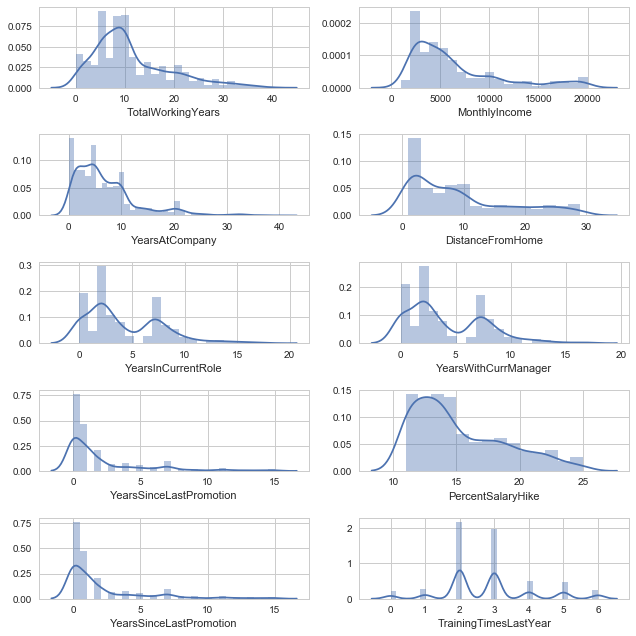

In [669]:
fig,ax = plt.subplots(5,2, figsize=(9,9))
sns.distplot(attrition['TotalWorkingYears'], ax = ax[0,0]) 
sns.distplot(attrition['MonthlyIncome'], ax = ax[0,1]) 
sns.distplot(attrition['YearsAtCompany'], ax = ax[1,0]) 
sns.distplot(attrition['DistanceFromHome'], ax = ax[1,1]) 
sns.distplot(attrition['YearsInCurrentRole'], ax = ax[2,0]) 
sns.distplot(attrition['YearsWithCurrManager'], ax = ax[2,1]) 
sns.distplot(attrition['YearsSinceLastPromotion'], ax = ax[3,0]) 
sns.distplot(attrition['PercentSalaryHike'], ax = ax[3,1]) 
sns.distplot(attrition['YearsSinceLastPromotion'], ax = ax[4,0]) 
sns.distplot(attrition['TrainingTimesLastYear'], ax = ax[4,1]) 
plt.tight_layout()

In [670]:
#Selecting the object datatype (Factor)

categorical = attrition.select_dtypes('object')
categorical.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [671]:
def plot_cat(column,size=5):
    if(column=='JobRole'):
        sns.factorplot(data=attrition,kind='count',x=column,size=10)
    else:
        sns.factorplot(data=attrition,kind='count',x=column,size=5)

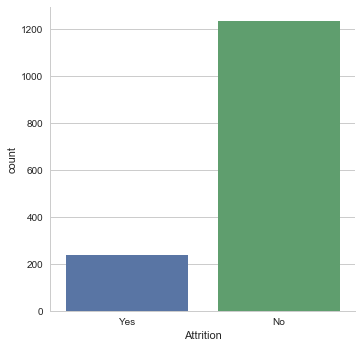

In [672]:
plot_cat('Attrition')

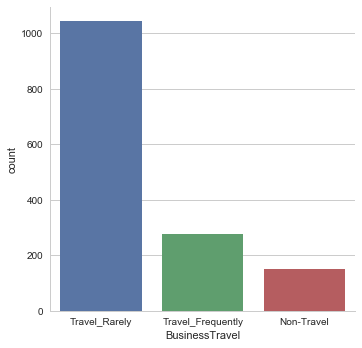

In [673]:
plot_cat('BusinessTravel') 

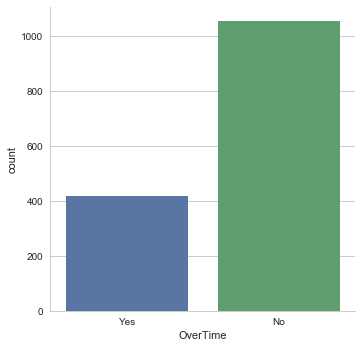

In [674]:
plot_cat('OverTime')

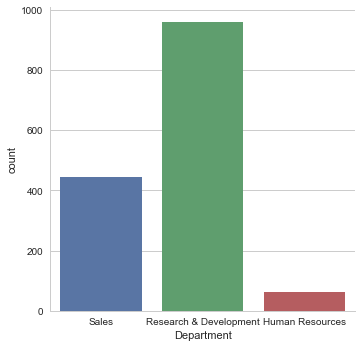

In [675]:
plot_cat('Department')   

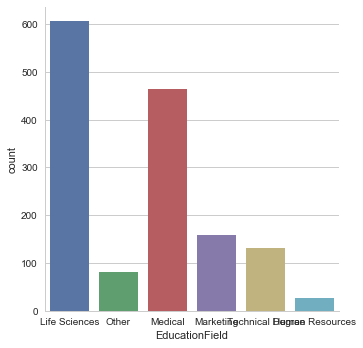

In [676]:
plot_cat('EducationField')

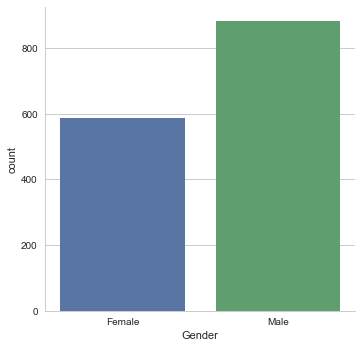

In [677]:
plot_cat('Gender') 

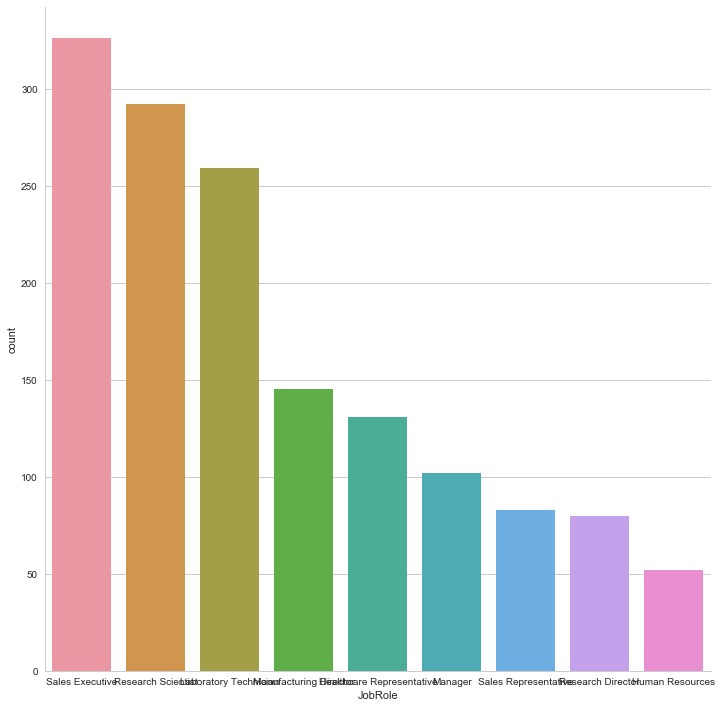

In [678]:
plot_cat('JobRole') 

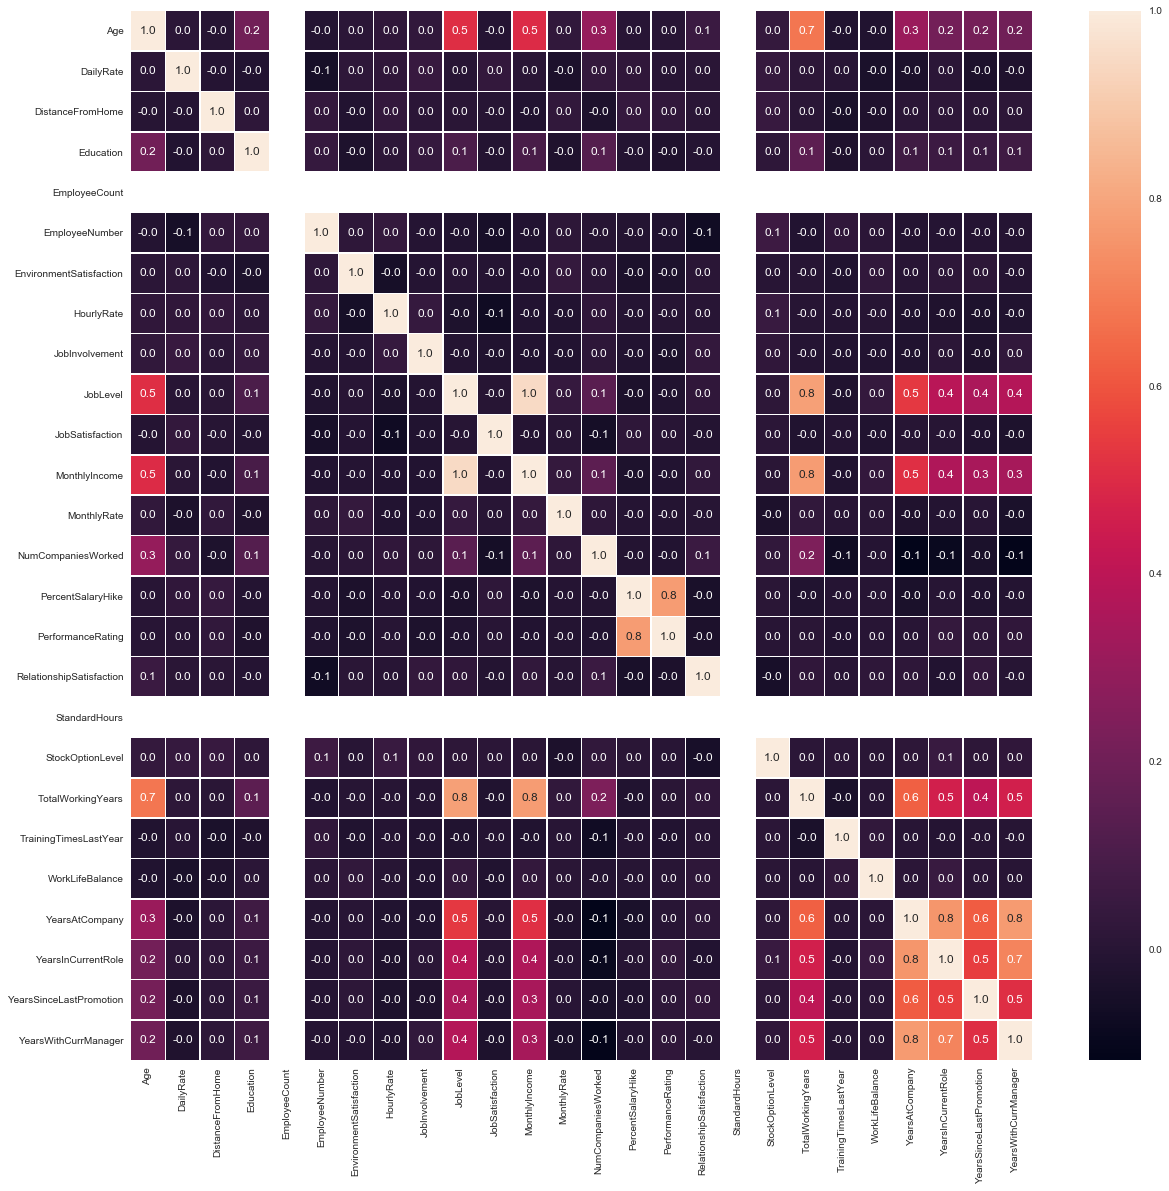

In [679]:
#Correlation Matrix to see correlation 

f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(attrition.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Inference - High correlations between variable (>=0.7) as per above correlation plot
Montly Income to Job Level (1.0)
Montly Income to Total working years (0.8)
Performance Rating to Performance Salary Hike (0.8)
Years in Company to Years with current manager (0.8)
Years in Company to Years in current role (0.8)
Job Leve and Monthly Income to Total working hours (0.8)
Age to Total working hours (0.7)
Years with current manager to Years in current role (0.7)

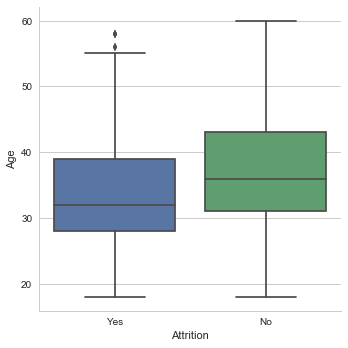

In [680]:
#Age VS Attrition

sns.factorplot(data=attrition,y='Age',x='Attrition',size=5,aspect=1,kind='box')

In [681]:
attrition.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

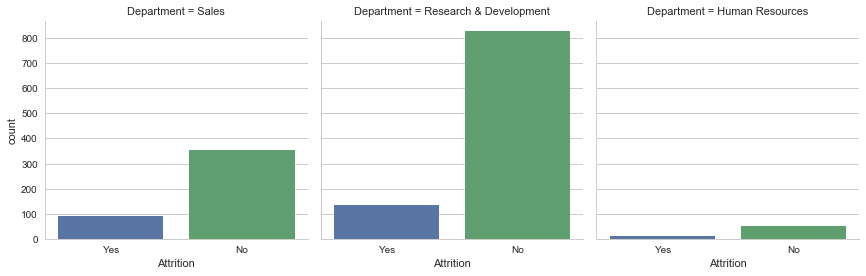

In [682]:
#Attrition vs Department

sns.factorplot(data=attrition,kind='count',x='Attrition',col='Department')

Attrition                     No       Yes
Department                                
Human Resources         0.809524  0.190476
Research & Development  0.861602  0.138398
Sales                   0.793722  0.206278


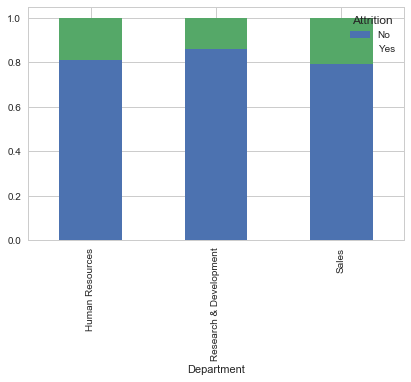

In [683]:
#Normalized graph to see how many have left and not left in department level

depvstar = pd.crosstab(columns=[attrition['Attrition']],index=[attrition['Department']],normalize='index')
depvstar.div(depvstar.sum(1),axis=0).plot.bar(stacked=True)
print(depvstar)

Attrition        No       Yes
Gender                       
Female     0.852041  0.147959
Male       0.829932  0.170068


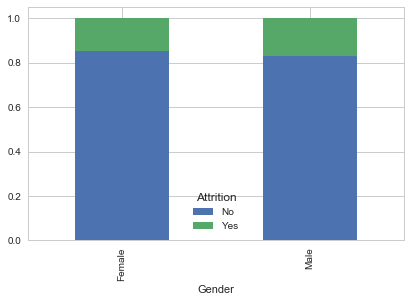

In [684]:
#Normalized graph to see how many have left and not left at Gender level

genvstar = pd.crosstab(columns=[attrition.Attrition],index=[attrition.Gender],normalize='index')
genvstar.div(genvstar.sum(1),axis=0).plot.bar(stacked=True)
print(genvstar)

Attrition        No       Yes
JobLevel                     
1          0.736648  0.263352
2          0.902622  0.097378
3          0.853211  0.146789
4          0.952830  0.047170
5          0.927536  0.072464


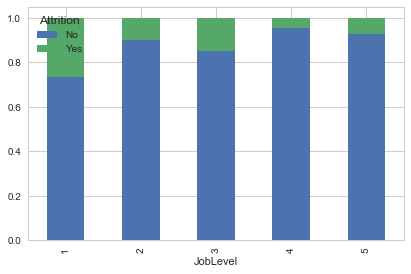

In [685]:
#Normalized graph to see how many have left and not left with joblevel

jobvstar = pd.crosstab(columns=[attrition.Attrition],index=[attrition.JobLevel],normalize='index')
jobvstar.div(jobvstar.sum(1),axis=0).plot.bar(stacked=True)
print(jobvstar)

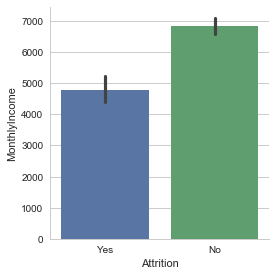

In [686]:
#Income vs Attrition

sns.factorplot(data=attrition,kind='bar',x='Attrition',y='MonthlyIncome')

Inference - Average income for 'No' class is quite higher and it is obvious as those earning well 
will certainly not be willing to exit the organisation.Similarly those employees who are probably not 
earning well will certainly want to change the company.

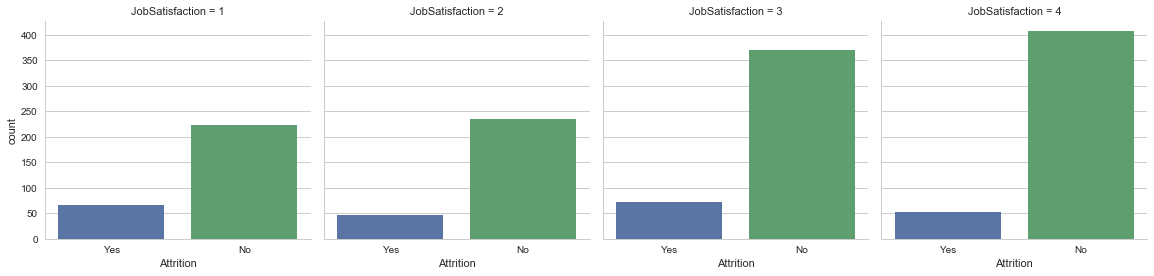

In [687]:
sns.factorplot(data=attrition,kind='count',x='Attrition',col='JobSatisfaction')

Attrition              No       Yes
JobSatisfaction                    
1                0.771626  0.228374
2                0.835714  0.164286
3                0.834842  0.165158
4                0.886710  0.113290


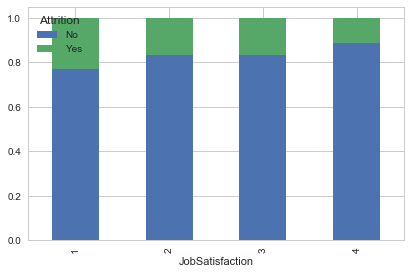

In [688]:
#Normalized graph to see how many have left and not left with Job Satisfaction level

jobsvstar = pd.crosstab(columns=[attrition['Attrition']],index=[attrition['JobSatisfaction']],normalize='index')
jobsvstar.div(jobsvstar.sum(1),axis=0).plot.bar(stacked=True)
print(jobsvstar)

Above stacked bar chart with job satisfaction shows a trend that employees with LOW joblevel satisfaction are leaving organisation.

Attrition                      No       Yes
EnvironmentSatisfaction                    
1                        0.746479  0.253521
2                        0.850174  0.149826
3                        0.863135  0.136865
4                        0.865471  0.134529


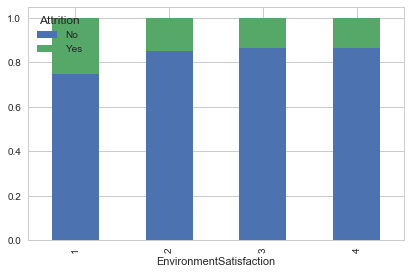

In [689]:
#Normalized graph to see how many have left and not left with environmental Satisfaction level

envvstar = pd.crosstab(columns=[attrition['Attrition']],index=[attrition['EnvironmentSatisfaction']],normalize='index')
envvstar.div(envvstar.sum(1),axis=0).plot.bar(stacked=True)
print(envvstar)

Attrition             No       Yes
JobInvolvement                    
1               0.662651  0.337349
2               0.810667  0.189333
3               0.855991  0.144009
4               0.909722  0.090278


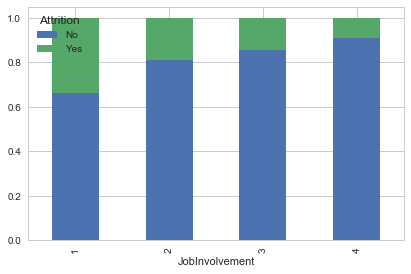

In [690]:
#Normalized graph to see how many have left and not left with job involvement

jobivstar = pd.crosstab(columns=[attrition['Attrition']],index=[attrition['JobInvolvement']],normalize='index')
jobivstar.div(envvstar.sum(1),axis=0).plot.bar(stacked=True)
print(jobivstar)

Attrition              No       Yes
WorkLifeBalance                    
1                0.687500  0.312500
2                0.831395  0.168605
3                0.857783  0.142217
4                0.823529  0.176471


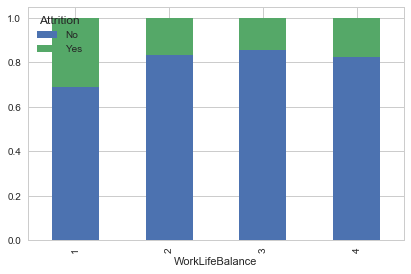

In [691]:
#Normalized graph to see how many have left and not left with work life balance level

workvstar = pd.crosstab(columns=[attrition['Attrition']],index=[attrition['WorkLifeBalance']],normalize='index')
workvstar.div(workvstar.sum(1),axis=0).plot.bar(stacked=True)
print(workvstar)

Attrition                       No       Yes
RelationshipSatisfaction                    
1                         0.793478  0.206522
2                         0.851485  0.148515
3                         0.845316  0.154684
4                         0.851852  0.148148


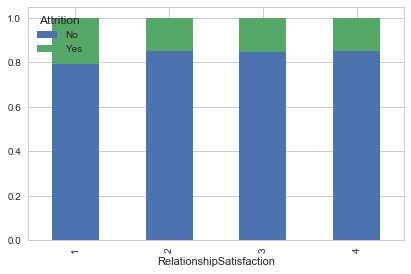

In [692]:
#Normalized graph to see how many have left and not left with Relationship satisfaction level

relvstar = pd.crosstab(columns=[attrition['Attrition']],index=[attrition['RelationshipSatisfaction']],normalize='index')
relvstar.div(relvstar.sum(1),axis=0).plot.bar(stacked=True)
print(relvstar)

    Feature Encoding

In [693]:
#Dropping the irrelevant columns -- manaul feature drop

attrition.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1,inplace=True)

In [694]:
#Changing the data type to correct data type(factors)

attrition['Education'] = attrition['Education'].astype(object)
attrition['EnvironmentSatisfaction'] = attrition['EnvironmentSatisfaction'].astype(object)
attrition['JobInvolvement'] = attrition['JobInvolvement'].astype(object)
attrition['JobLevel'] = attrition['JobLevel'].astype(object)
attrition['JobSatisfaction'] = attrition['JobSatisfaction'].astype(object)
attrition['PerformanceRating'] = attrition['PerformanceRating'].astype(object)
attrition['RelationshipSatisfaction'] = attrition['RelationshipSatisfaction'].astype(object)
attrition['StockOptionLevel'] = attrition['StockOptionLevel'].astype(object)
attrition['WorkLifeBalance'] = attrition['WorkLifeBalance'].astype(object)

In [695]:
categorical = []
numerical = []

for col, value in attrition.iteritems():
    if value.dtype == 'object':
        categorical.append(col)

for col,value in attrition.iteritems():
    if value.dtype == 'int':
        numerical.append(col)

In [696]:
attrition_cat = attrition[categorical]
attrition_cat = attrition_cat.drop(['Attrition'], axis=1)

In [697]:
attrition_cat = pd.get_dummies(attrition_cat)
attrition_num = attrition[numerical]
attrition_final = pd.concat([attrition_num,attrition_cat],axis=1)

In [698]:
target_map = {'Yes':1, 'No':0}
# Use the pandas apply method to numerically encode our attrition target variable
target = attrition["Attrition"].apply(lambda x: target_map[x])
target.head(3)

0    1
1    0
2    1
Name: Attrition, dtype: int64

In [699]:
scaler = StandardScaler()
scaled_attr = scaler.fit_transform(attrition_final)
X = scaled_attr
Y = target

In [700]:
#not using standard scalar, if using replace attrition_final with X and target with Y

train, test, target_train, target_val = train_test_split(X,Y,train_size= 0.80,random_state=0);

                        #SMOTE for over-sampling the minor class data

In [701]:
oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_sample(train,target_train)

                            Logistic Regression

In [702]:
logit = LogisticRegression()
logit.fit(smote_train,smote_target)
logit_predictions = logit.predict(test)
print("Accuracy score: {}".format(accuracy_score(target_val,logit_predictions)))
print("="*80)
print(classification_report(target_val, logit_predictions))

Accuracy score: 0.7653061224489796
              precision    recall  f1-score   support

           0       0.94      0.77      0.84       245
           1       0.39      0.76      0.52        49

   micro avg       0.77      0.77      0.77       294
   macro avg       0.67      0.76      0.68       294
weighted avg       0.85      0.77      0.79       294



                         Random Forest after testing fine tuned parameters

In [703]:
#Tried to find best parameters using GridSearchCV. Got the below best parameters after manual fine tuning

seed = 0   # We set our random seed to zero for reproducibility
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 1000,
#     'warm_start': True, 
    'max_features': 0.3,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

rf = RandomForestClassifier(**rf_params)
rf.fit(smote_train, smote_target)
rf_predictions = rf.predict(test)
print("Accuracy score: {}".format(accuracy_score(target_val, rf_predictions)))
print("="*80)
print(classification_report(target_val, rf_predictions))

Accuracy score: 0.8197278911564626
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       245
           1       0.46      0.47      0.46        49

   micro avg       0.82      0.82      0.82       294
   macro avg       0.68      0.68      0.68       294
weighted avg       0.82      0.82      0.82       294



In [704]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = attrition_final.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
OverTime_Yes,0.141966
OverTime_No,0.138201
StockOptionLevel_0,0.089877
JobLevel_1,0.082284
MaritalStatus_Single,0.057145
EnvironmentSatisfaction_1,0.043694
StockOptionLevel_1,0.041105
JobLevel_2,0.038744
JobSatisfaction_4,0.035056
MaritalStatus_Married,0.025812


                                Gradient Boosting

In [705]:
#Tried to find best parameters using GridSearchCV. Got the below best parameters after manual fine tuning

gb_params ={
    'n_estimators': 1500,
    'max_features': 0.3,
    'learning_rate' : 0.25,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}
gb = GradientBoostingClassifier(**gb_params)
# Fit the model to our SMOTEd train and target
gb.fit(smote_train, smote_target)
# Get our predictions
gb_predictions = gb.predict(test)
print(accuracy_score(target_val, gb_predictions))
print(classification_report(target_val, gb_predictions))

0.8401360544217688
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       245
           1       0.53      0.37      0.43        49

   micro avg       0.84      0.84      0.84       294
   macro avg       0.71      0.65      0.67       294
weighted avg       0.82      0.84      0.83       294



                         ADA Boosting

In [706]:
from sklearn.ensemble import AdaBoostClassifier as ABC

model = ABC(n_estimators=100, random_state=0, learning_rate=.80).fit(smote_train,smote_target)
prediction = model.predict(test)
print(accuracy_score(target_val, prediction))
print(classification_report(target_val, prediction))

0.8741496598639455
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       245
           1       0.67      0.49      0.56        49

   micro avg       0.87      0.87      0.87       294
   macro avg       0.78      0.72      0.75       294
weighted avg       0.86      0.87      0.87       294



                        Support Vector Classifier

In [707]:
model = SVC(random_state=42).fit(smote_train,smote_target)
prediction = model.predict(test)
print(accuracy_score(target_val, prediction))
print(classification_report(target_val, prediction))

0.8503401360544217
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       245
           1       0.57      0.43      0.49        49

   micro avg       0.85      0.85      0.85       294
   macro avg       0.73      0.68      0.70       294
weighted avg       0.84      0.85      0.84       294



                            XGB Classifier

In [708]:
xgb_params ={
    'n_estimators': 850,
    #'max_features': 0.25,
    'learning_rate' : 0.001,
    'max_depth': 6,
    'min_samples_leaf': 5,
    'subsample': 1,
    'max_features' : 'auto',
    'random_state' : seed,
    'verbose': 0
}
np.random.seed(42)
eval_set = [(test,target_val)]
model = XGBClassifier(**xgb_params)
model.fit(smote_train,smote_target,eval_metric='logloss')
prediction = model.predict(test)
print(accuracy_score(target_val, prediction))
print(classification_report(target_val, prediction))

0.8503401360544217
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       245
           1       0.56      0.51      0.53        49

   micro avg       0.85      0.85      0.85       294
   macro avg       0.73      0.71      0.72       294
weighted avg       0.85      0.85      0.85       294



                                Neural Networks -- KERAS

In [709]:
np.random.seed(212)
import keras_metrics
model = Sequential()
model.add(Dense(input_dim = 64,units=64,activation = 'relu'))
model.add(Dropout(0.5))
#model.add(Dense(units=64,activation = 'relu'))
#model.add(Dropout(0.5))
#model.add(Dense(units=32,activation = 'relu'))
#model.add(Dropout(0.5))
model.add(Dense(units=16,activation = 'relu'))
model.add(Dropout(0.5))
#model.add(Dense(units=8,activation = 'relu'))
#model.add(Dropout(0.5))
model.add(Dense(units=4,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,activation = 'sigmoid'))
model.compile(optimizer=Adam(lr=0.01),loss='binary_crossentropy',metrics=['accuracy',keras_metrics.precision(),keras_metrics.recall()])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_63 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_77 (Dense)             (None, 16)                1040      
_________________________________________________________________
dropout_64 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_78 (Dense)             (None, 4)                 68        
_________________________________________________________________
dropout_65 (Dropout)         (None, 4)                 0         
_________________________________________________________________
dense_79 (Dense)             (None, 1)                 5         
Total para

In [710]:
History = model.fit(train,target_train,validation_data=(test,target_val),epochs=100)

Train on 1176 samples, validate on 294 samples
Epoch 1/100
1176/1176 [==============================] - 2s 1ms/step - loss: 0.5710 - acc: 0.8206 - precision: 0.2830 - recall: 0.0798 - val_loss: 0.4564 - val_acc: 0.8333 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
1176/1176 [==============================] - 0s 239us/step - loss: 0.4673 - acc: 0.8393 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.3873 - val_acc: 0.8333 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
1176/1176 [==============================] - 0s 259us/step - loss: 0.4436 - acc: 0.8401 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4038 - val_acc: 0.8333 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/100
1176/1176 [==============================] - ETA: 0s - loss: 0.4202 - acc: 0.8402 - precision: 0.2500 - recall: 0.0056     - 0s 291us/step - loss: 0.4205 - acc: 0.8393 - precision: 0.4000 - recall: 0.0106 - val_loss: 0.3938 - val_acc: 0.8333 - va

Epoch 37/100
1176/1176 [==============================] - 0s 252us/step - loss: 0.2978 - acc: 0.8665 - precision: 0.7818 - recall: 0.2287 - val_loss: 0.5401 - val_acc: 0.8605 - val_precision: 0.9000 - val_recall: 0.1837
Epoch 38/100
1176/1176 [==============================] - 0s 238us/step - loss: 0.3171 - acc: 0.8512 - precision: 0.6667 - recall: 0.1383 - val_loss: 0.4380 - val_acc: 0.8707 - val_precision: 0.9231 - val_recall: 0.2449
Epoch 39/100
1176/1176 [==============================] - 0s 238us/step - loss: 0.3209 - acc: 0.8495 - precision: 0.6341 - recall: 0.1383 - val_loss: 0.4253 - val_acc: 0.8333 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 40/100
1176/1176 [==============================] - 0s 241us/step - loss: 0.2914 - acc: 0.8580 - precision: 0.7838 - recall: 0.1543 - val_loss: 0.5018 - val_acc: 0.8707 - val_precision: 0.9231 - val_recall: 0.2449
Epoch 41/100
1176/1176 [==============================] - 0s 238us/step - loss: 0.2990 - acc: 0.8537 - precision

1176/1176 [==============================] - 0s 245us/step - loss: 0.2773 - acc: 0.8682 - precision: 0.7619 - recall: 0.2553 - val_loss: 0.5675 - val_acc: 0.8810 - val_precision: 0.8889 - val_recall: 0.3265
Epoch 74/100
1176/1176 [==============================] - 0s 245us/step - loss: 0.2591 - acc: 0.8835 - precision: 0.7525 - recall: 0.4043 - val_loss: 0.6414 - val_acc: 0.8741 - val_precision: 0.8000 - val_recall: 0.3265
Epoch 75/100
1176/1176 [==============================] - 0s 248us/step - loss: 0.2593 - acc: 0.8801 - precision: 0.7117 - recall: 0.4202 - val_loss: 0.5685 - val_acc: 0.8707 - val_precision: 0.8667 - val_recall: 0.2653
Epoch 76/100
1176/1176 [==============================] - 0s 248us/step - loss: 0.2491 - acc: 0.8759 - precision: 0.6842 - recall: 0.4149 - val_loss: 0.6307 - val_acc: 0.8707 - val_precision: 0.7895 - val_recall: 0.3061
Epoch 77/100
1176/1176 [==============================] - 0s 248us/step - loss: 0.2490 - acc: 0.8852 - precision: 0.7265 - recall: 0.

In [711]:
pred = model.predict(test)
model.evaluate(test,target_val)

294/294 [==============================] - 0s 150us/step


[0.7908720222561538,
 0.8571428567373833,
 0.6842105227146814,
 0.2653061219075385]

                                    Predicting metrics for Classification Models

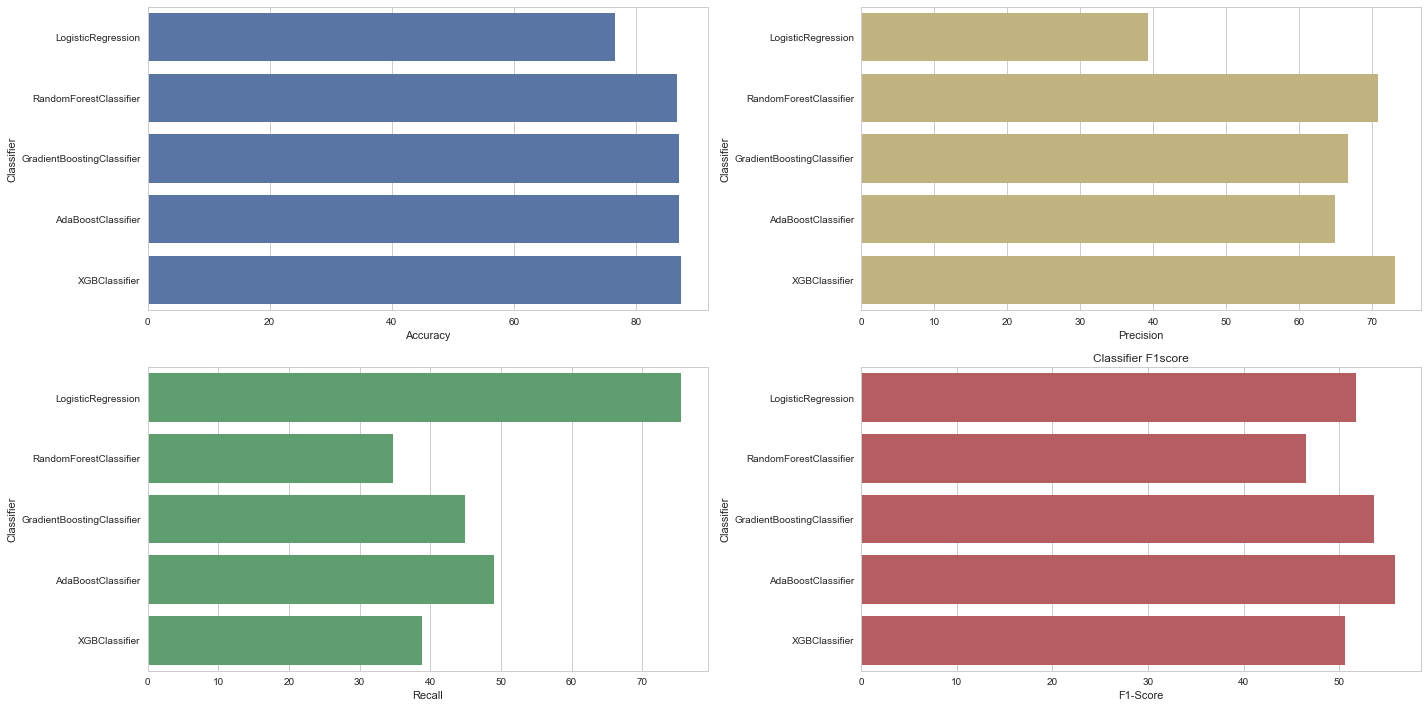

In [716]:
acc_dict = {}
recall_dict = {}
precision_dict = {}
f1score_dict = {}
log_cols = ["Classifier", "Accuracy","Recall","Precision","F1-Score"]
log = pd.DataFrame(columns=log_cols)
classifiers = [LogisticRegression(),RandomForestClassifier(),GradientBoostingClassifier(),
               ABC(),XGBClassifier()]
for classifier in classifiers:
    name = classifier.__class__.__name__
    classifier.fit(smote_train,smote_target)
    preds = classifier.predict(test)
    acc = accuracy_score(target_val,preds)
    precision = precision_score(target_val,preds)
    recall = recall_score(target_val,preds)
    f1score = f1_score(target_val,preds)
    
    
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc
        
    if name in recall_dict:
        recall_dict[name] += recall
    else:
        recall_dict[name] = recall
        
    if name in precision_dict:
        precision_dict[name] += precision
    else:
        precision_dict[name] = precision
        
    if name in f1score_dict:
        f1score_dict[name] += f1score
    else:
        f1score_dict[name] = f1score
        
for classifier in acc_dict:
    acc_dict[classifier] = round(acc_dict[classifier]*100,2)
    recall_dict[classifier] = round(recall_dict[classifier]*100,2)
    precision_dict[classifier] = round(precision_dict[classifier]*100,2)
    f1score_dict[classifier] = round(f1score_dict[classifier]*100,2)
    log_entry = pd.DataFrame([[classifier, acc_dict[classifier],recall_dict[classifier],precision_dict[classifier], 
                             f1score_dict[classifier]]],columns=log_cols)
    log = log.append(log_entry)

fig,ax = plt.subplots(2,2, figsize=(20,10))
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b",ax=ax[0,0])
plt.xlabel('Recall')
plt.title('Classifier Recall')
sns.barplot(x='Recall', y='Classifier', data=log, color="g",ax=ax[1,0])
plt.xlabel('Precision')
plt.title('Classifier Precision')
sns.barplot(x='Precision', y='Classifier', data=log, color="y",ax=ax[0,1])
plt.xlabel('F1-Score')
plt.title('Classifier F1score')
sns.barplot(x='F1-Score', y='Classifier', data=log, color="r",ax=ax[1,1])
plt.tight_layout()

In [717]:
print('metrics score of classifiers:')
print('*'*80)
print('\n',log)

metrics score of classifiers:
********************************************************************************

                    Classifier  Accuracy  Recall  Precision  F1-Score
0          LogisticRegression     76.53   75.51      39.36     51.75
0      RandomForestClassifier     86.73   34.69      70.83     46.58
0  GradientBoostingClassifier     87.07   44.90      66.67     53.66
0          AdaBoostClassifier     87.07   48.98      64.86     55.81
0               XGBClassifier     87.41   38.78      73.08     50.67
